## Crossover

### Simulated Binary Crossover (SBX)

Details about the crossover can be found in <cite data-cite="sbx"></cite>. Real values can be represented by a binary notation and then a the point crossovers can be performed. SBX simulated this operation by using a probability distribution *simulating* the binary crossover.

A crossover object can be created by 

In [1]:
from pymoo.operators.crossover.sbx import SBX

crossover = SBX()

As arguments, the probability of a crossover and the *eta* parameter can be provided.

In the example below, we demonstrate a crossover in an optimization problem with only one variable. A crossover is performed between two points, *0.2* and *0.8*, and the resulting exponential distribution is visualized. Depending on the *eta*, the exponential distribution can be fine-tuned.

The probability of SBX follows an exponential distribution. Please note for demonstration purposes, we have set *prob_var=1.0*, which means every variable participates in the crossover (necessary because there exists only one variable). However, it is suggested to perform a crossover of two variables forms each parent with a probability of *0.5*, which is defined by default if not defined otherwise.

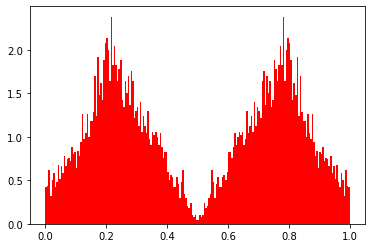

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.core.individual import Individual
from pymoo.core.problem import Problem
from pymoo.operators.crossover.sbx import SBX


def show(eta_cross):
    problem = Problem(n_var=1, xl=0.0, xu=1.0)

    a, b = Individual(X=np.array([0.2])), Individual(X=np.array([0.8]))

    parents = [[a, b] for _ in range(5000)]

    off = SBX(prob=1.0, prob_var=1.0, eta=eta_cross).do(problem, parents)
    Xp = off.get("X")

    plt.hist(Xp, range=(0, 1), bins=200, density=True, color="red")
    plt.show()


show(1)

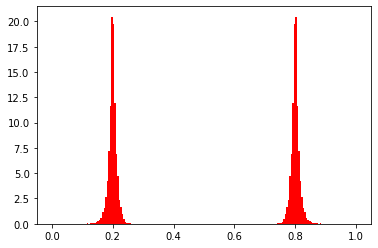

In [3]:
show(30)

Also, it can be used for integer variables. The bounds are slightly modified, and after doing the crossover, the variables are rounded.

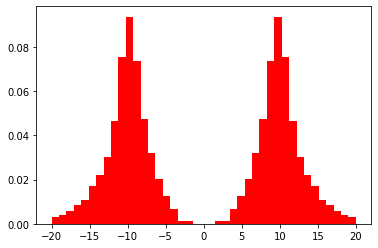

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.core.individual import Individual
from pymoo.core.problem import Problem
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.repair.rounding import RoundingRepair


def show(eta_cross):
    problem = Problem(n_var=1, xl=-20, xu=20)

    a, b = Individual(X=np.array([-10])), Individual(X=np.array([10]))

    parents = [[a, b] for _ in range(5000)]

    off = SBX(prob=1.0, prob_var=1.0, eta=eta_cross, repair=RoundingRepair(), vtype=float).do(problem, parents)
    Xp = off.get("X")

    plt.hist(Xp, range=(-20, 20), bins=41, density=True, color="red")
    plt.show()


show(3)

### Point Crossover


One Point Crossover


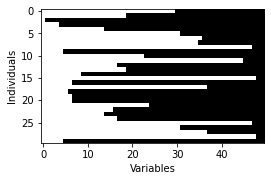

Two Point Crossover


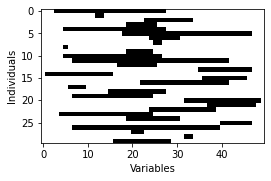

K Point Crossover (k=4)


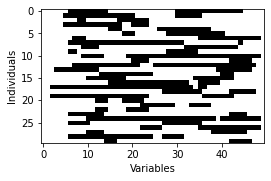

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.core.individual import Individual
from pymoo.core.problem import Problem
from pymoo.operators.crossover.pntx import PointCrossover, SinglePointCrossover, TwoPointCrossover

n_var, n_matings = 50, 30

problem = Problem(n_var=n_var, xl=0.0, xu=1.0, var_type=int)

a, b = Individual(X=np.arange(1, n_var + 1)), Individual(X=-np.arange(1, n_var + 1))

parents = [[a, b] for _ in range(n_matings)]

def show(M):
    plt.figure(figsize=(4, 6))
    plt.imshow(M, cmap='Greys', interpolation='nearest')
    plt.xlabel("Variables")
    plt.ylabel("Individuals")
    plt.show()


print("One Point Crossover")
off = SinglePointCrossover(prob=1.0).do(problem, parents)
Xp = off.get("X")
show(Xp[:n_matings] != a.X)

print("Two Point Crossover")
off = TwoPointCrossover(prob=1.0).do(problem, parents)
Xp = off.get("X")
show(Xp[:n_matings] != a.X)

print("K Point Crossover (k=4)")
off = PointCrossover(prob=1.0, n_points=4).do(problem, parents)
Xp = off.get("X")
show(Xp[:n_matings] != a.X)


### Exponential Crossover


The exponential crossover is mostly a one-point crossover, but occasionally it can be a two-point crossover. 
First, randomly a starting index is chosen. Then, we add the next variable to be mutated with a specific probability. If we reach the last variable, we continue with the first (wrap around).

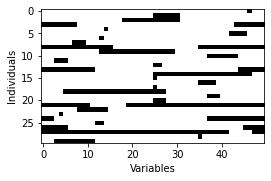

In [6]:
from pymoo.operators.crossover.expx import ExponentialCrossover

off = ExponentialCrossover(prob=1.0, prob_exp=0.9).do(problem, parents)
Xp = off.get("X")
show((Xp[:n_matings] != a.X))

### Uniform Crossover


The uniform crossover takes with a probability of 0.5 the values from each parent. 
In contrast to a point crossover, not a sequence of variables is taken, but random indices.

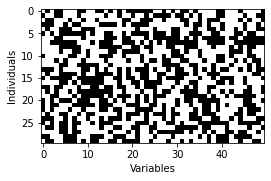

In [7]:
from pymoo.operators.crossover.ux import UniformCrossover
off = UniformCrossover(prob=1.0).do(problem, parents)
Xp = off.get("X")
show(Xp[:n_matings] != a.X)

### Half Uniform Crossover ('bin_hux', 'int_hux')


The half uniform crossover will first determine what indices are different in the first and the second parent. Then, it will take half of the difference to be selected from the other parent.

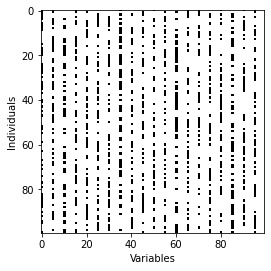

Difference in bits (a to b):  20
Difference in bits (a to off):  1000
Crossover Rate:  50.0


In [8]:
from pymoo.operators.crossover.hux import HalfUniformCrossover

n_var, n_matings = 100, 100

problem = Problem(n_var=n_var, xl=0.0, xu=1.0, var_type=int)

a = Individual(X=np.full(n_var, False))
b = Individual(X=np.array([k % 5 == 0 for k in range(n_var)]))

parents = [[a, b] for _ in range(n_matings)]

off = HalfUniformCrossover(prob=1.0).do(problem, parents)
Xp = off.get("X")
show(Xp[:n_matings] != a.X)

diff_a_to_b = (a.X != b.X).sum()
diff_a_to_off = (a.X != Xp[:n_matings]).sum()

print("Difference in bits (a to b): ", diff_a_to_b)
print("Difference in bits (a to off): ", diff_a_to_off)
print("Crossover Rate: ", diff_a_to_off / diff_a_to_b)

### API